<a href="https://colab.research.google.com/github/gouthamans14/Transformers_Notebooks/blob/main/Notebooks/FineTuningCustomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 10.2 MB/s eta 0:00:00


In [ ]:
#! pip install accelerate -U

In [1]:
#! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.7 MB/s eta 0:00:00


In [2]:
#! pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.8 MB/s eta 0:00:00


In [2]:
import transformers
import numpy as np
import pandas as pd
import torch

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

File ‘AirlineTweets.csv’ already there; not retrieving.



In [4]:
df = pd.read_csv("AirlineTweets.csv")

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df.shape

(14640, 15)

In [7]:
df= df[["airline_sentiment","text"]]

In [8]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

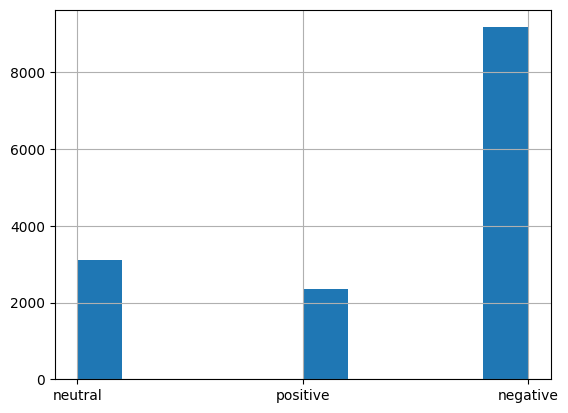

In [9]:
df["airline_sentiment"].hist()

In [10]:
target_map ={"positive":1,"negative":0, "neutral":2}
df['target'] = df["airline_sentiment"].map(target_map)

In [11]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [12]:
df2 = df[["text","target"]]

In [13]:
df2.columns = ["text","labels"]

In [14]:
df2.to_csv("data.csv",index=None)
df2.head()


,text,labels
0,@VirginAmerica What @dhepburn said.,2
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


In [15]:
from datasets import load_dataset

In [16]:
raw_dataset = load_dataset("csv", data_files= "data.csv")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-4985fc1cdf05169a/0.0.0/eea64c71ca8b46dd3f537ed218fc9bf495d5707789152eb2764f5c78fa66d59d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 14640
    })
})

In [18]:
split = raw_dataset["train"].train_test_split(test_size=0.3, seed=43)

In [19]:
split

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 4392
    })
})

In [20]:
checkpoint = "distilbert-base-cased"

In [21]:
from transformers import AutoTokenizer

In [22]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [23]:
def tokenize_fn(batch):
  return tokenizer(batch["text"], truncation=True)

In [24]:
tokenized_datasets =split.map(tokenize_fn, batched=True)

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

In [25]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

In [26]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=3)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier.wei

In [27]:
#! pip install torchinfo

In [59]:
from torchinfo import summary

In [55]:
! pip install torchinfo

In [60]:
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           2,307
├─Dropout: 1-4                                          --
Total params: 65,783,811
Trainable params: 65,783,811
Non-trainable params: 0

In [28]:
training_args = TrainingArguments(
    output_dir ="training_dir",
    evaluation_strategy = "epoch",
    save_strategy ="epoch",
    num_train_epochs = 3,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 64

)

In [31]:
def compute_metrics (logits_labels):
  logits, labels= logits_labels
  print(logits)
  predictions = np.argmax(logits, axis=-1)
  acc = np.mean(predictions==labels)
  f1 = f1_score(labels,predictions,average="macro")
  return {"accuracy":acc,"f1":f1}

In [35]:
trainer = Trainer(
    model,
    training_args,
    train_dataset = tokenized_datasets["train"],
    eval_dataset = tokenized_datasets["test"],
    tokenizer = tokenizer,
    compute_metrics = compute_metrics
)

In [36]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.545700,0.443223,0.825820,0.776150
2,0.339800,0.469517,0.834472,0.784881
3,0.239700,0.652541,0.830146,0.781671


[[ 3.308358   -2.4959066  -0.82426095]
 [ 0.7058536  -2.2677507   1.9914255 ]
 [-0.9416509  -0.31087318  1.2606403 ]
 ...
 [-1.584049    0.92575157  0.863761  ]
 [ 3.2248418  -2.8410943  -0.29191482]
 [-0.77286136 -0.11424854  0.8895912 ]]
[[ 4.115185   -2.8996754  -1.2813133 ]
 [-0.11570422 -2.0263631   2.5939276 ]
 [-1.7439047  -0.02991557  1.7461989 ]
 ...
 [-2.3519924   1.6994256   0.6360721 ]
 [ 4.1760435  -3.2522583  -0.8414681 ]
 [-1.6114582   1.556973   -0.29642856]]
[[ 5.0900307 -3.4507904 -1.6347343]
 [-1.1887447 -1.9722742  3.6618009]
 [-2.6893725  0.7204644  1.8612274]
 ...
 [-3.2949224  2.7723222  0.3642522]
 [ 5.1733594 -3.6685343 -1.4106883]
 [-2.6433437  2.905107  -0.7664686]]


TrainOutput(global_step=1923, training_loss=0.328296718904889, metrics={'train_runtime': 188.6335, 'train_samples_per_second': 162.983, 'train_steps_per_second': 10.194, 'total_flos': 387664476276672.0, 'train_loss': 0.328296718904889, 'epoch': 3.0})

In [37]:
!ls training_dir

checkpoint-1282  checkpoint-1923  checkpoint-641  runs


In [42]:
from transformers import pipeline
savedmodel = pipeline("text-classification", model="training_dir/checkpoint-1282",device=0)

In [45]:
split['test']['text'][0]

"Hypocrisy RT @united @gg8929 I'm sorry, we're not able to offer a full refund because the exchange rate is not what you were hoping for. ^KP"

In [ ]:
test_pred = savedmodel(split['test']['text'])

In [44]:
savedmodel(split['test']['text'][0])

[{'label': 'LABEL_0', 'score': 0.994598388671875}]

In [46]:
test_pred = savedmodel(split['test']['text'])

In [51]:
test_pred[0]['label'].split("_")[1]

'0'

In [53]:
def get_label(label_text):
  return(int(label_text.split("_")[1]))
test_pred_labels = [get_label(i['label']) for i in test_pred]


In [56]:
#test_pred_labels

In [55]:
split

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 4392
    })
})

In [59]:
print(f"Accuracy: {accuracy_score(split['test']['labels'],test_pred_labels)}")

Accuracy: 0.8344717668488161


In [61]:
print(f"F1: {f1_score(split['test']['labels'], test_pred_labels,average='macro')}" )

F1: 0.7848809536977112


In [67]:
import seaborn as sns

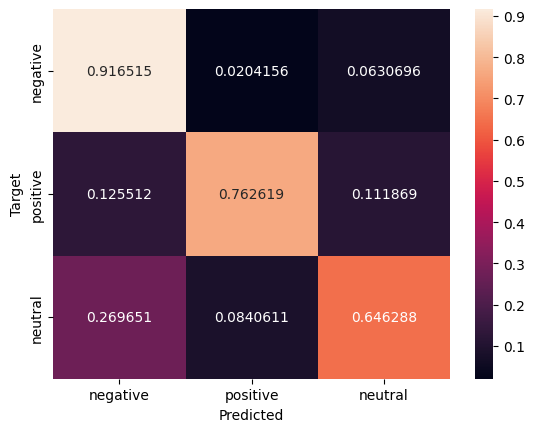

In [75]:
def plot_cm(cm):
  classes = ["negative","positive","neutral"]
  df_cm = pd.DataFrame(cm, index=classes,columns=classes)
  ax = sns.heatmap(df_cm,annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")
cm =confusion_matrix(split['test']['labels'], test_pred_labels,normalize="true")
plot_cm(cm)


In [72]:
df_cm

,negative,positive,nuetral
negative,0.916515,0.020416,0.063070
positive,0.125512,0.762619,0.111869
nuetral,0.269651,0.084061,0.646288


In [77]:
from transformers import AutoConfig

In [78]:
config = AutoConfig.from_pretrained(checkpoint)

In [86]:
config.id2label ={id:label for label,id in target_map.items()}

In [87]:
config.id2label

{1: 'positive', 0: 'negative', 2: 'neutral'}

In [90]:
config.label2id = target_map

In [91]:
config.label2id

{'positive': 1, 'negative': 0, 'neutral': 2}

In [85]:
{id:label for label,id in target_map.items()}

{1: 'positive', 0: 'negative', 2: 'neutral'}

In [89]:
target_map

{'positive': 1, 'negative': 0, 'neutral': 2}

 we can pass this config in the AutomodelClassification api
so our output will directly get labels("positive") instrad of "label_0"

In [93]:
model_config = AutoModelForSequenceClassification.from_pretrained(checkpoint,config=config)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier.wei

In [98]:
training_args_config = TrainingArguments(
    output_dir ="training_dir_config",
     evaluation_strategy = "epoch",
    save_strategy ="epoch",
    num_train_epochs = 3,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 64

)

In [ ]:
training_args = TrainingArguments(
    output_dir ="training_dir",
    evaluation_strategy = "epoch",
    save_strategy ="epoch",
    num_train_epochs = 3,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 64

)

In [100]:
trainer_config = Trainer(
    model_config,
    training_args_config,
    train_dataset = tokenized_datasets["train"],
    eval_dataset = tokenized_datasets["test"],
    tokenizer = tokenizer,
    compute_metrics = compute_metrics
)

In [101]:
trainer_config.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.509000,0.436874,0.829463,0.777747
2,0.331100,0.479733,0.834927,0.786779
3,0.234600,0.666768,0.831512,0.784636


[[ 3.1002784  -2.7702093  -1.1667672 ]
 [ 0.19703451 -2.0968742   1.5665836 ]
 [-1.0273504  -0.4707563   1.4267462 ]
 ...
 [-1.0833012   0.5593226   0.4896271 ]
 [ 3.0981174  -3.392844   -0.5820725 ]
 [-1.1708313   0.9908049   0.32806313]]
[[ 3.974201   -3.1908996  -1.7104965 ]
 [-0.76310545 -1.6539774   2.0650437 ]
 [-1.741506   -0.618326    2.1635814 ]
 ...
 [-1.218075    0.23064597  0.9181807 ]
 [ 3.5817602  -4.0393896  -0.6410148 ]
 [-1.5134667   3.3203356  -1.174804  ]]
[[ 4.9196873  -3.6869576  -2.2918    ]
 [-1.684798   -1.8557785   3.13549   ]
 [-2.7588465  -0.46200916  2.8975027 ]
 ...
 [-2.4693387   0.15728505  2.0793946 ]
 [ 4.7493715  -4.3475137  -1.5906534 ]
 [-2.217455    4.389199   -1.4629127 ]]


TrainOutput(global_step=1923, training_loss=0.3108870654569835, metrics={'train_runtime': 191.9059, 'train_samples_per_second': 160.204, 'train_steps_per_second': 10.021, 'total_flos': 387664476276672.0, 'train_loss': 0.3108870654569835, 'epoch': 3.0})

In [ ]:
/content/training_dir_config/checkpoint-1282

In [103]:
config_model =  pipeline("text-classification", model="/content/training_dir_config/checkpoint-1282",device=0)

### The Difference

In [105]:
config_model(split['test']['text'][0])

[{'label': 'negative', 'score': 0.995846688747406}]

In [106]:
savedmodel(split['test']['text'][0])

[{'label': 'LABEL_0', 'score': 0.994598388671875}]